In [49]:
# Section 1
# Imports
from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
np.random.seed(0)
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD, RMSprop

In [50]:
# Section 2
# Prepare train and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## change total number
x_train = x_train[range(5000)]
y_train = y_train[range(5000)]
x_test = x_test[range(1000)]
y_test = y_test[range(1000)]

## pre-process
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## show number of train and test sets
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

5000 train samples
1000 test samples


9 input examples for train and test
Train label : [5 0 4 1 9 2 1 3 1]
Test label : [7 2 1 0 4 1 4 9 5]


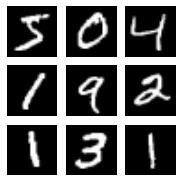

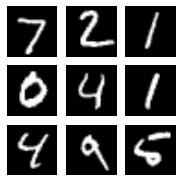

In [51]:
# Section 3
# Check train and test data
## label check
print('9 input examples for train and test')
print('Train label :', y_train[range(9)].argmax(1))
print('Test label :', y_test[range(9)].argmax(1))

## plot images
fig = plt.figure(figsize=(3, 3))
for i in range(9):
    fig_sub = fig.add_subplot(3, 3, i+1, xticks=[], yticks=[])
    fig_sub.imshow(x_train[i].reshape((28,28)), cmap='gray')

fig = plt.figure(figsize=(3, 3))
for i in range(9):
    fig_sub = fig.add_subplot(3, 3, i+1, xticks=[], yticks=[])
    fig_sub.imshow(x_test[i].reshape((28,28)), cmap='gray')

In [52]:
# Section 5
# Input and Output
input_shape = (28, 28)
output_k = 10

In [53]:
# Section 6
# Model definition
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(output_k, activation='softmax'))

## show model structure
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Section 7
# Training settings
loss = 'categorical_crossentropy'
batch_size = 128
epochs = 20

optimizer = SGD(lr=0.01)

In [57]:
# Section 8
# Train model
model.compile(loss=loss, optimizer=optimizer, metrics= ['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  validation_data=(x_test, y_test))

Train on 5000 samples, validate on 1000 samples
Epoch 1/20
5000/5000 [==============================] - 1s - loss: 1.6003 - acc: 0.7272 - val_loss: 1.5585 - val_acc: 0.7030
Epoch 2/20
5000/5000 [==============================] - 0s - loss: 1.3229 - acc: 0.7718 - val_loss: 1.3173 - val_acc: 0.7330
Epoch 3/20
5000/5000 [==============================] - 0s - loss: 1.0947 - acc: 0.7938 - val_loss: 1.1351 - val_acc: 0.7320
Epoch 4/20
5000/5000 [==============================] - 1s - loss: 0.9271 - acc: 0.8198 - val_loss: 0.9808 - val_acc: 0.7890
Epoch 5/20
5000/5000 [==============================] - 0s - loss: 0.8028 - acc: 0.8382 - val_loss: 0.8725 - val_acc: 0.8060
Epoch 6/20
5000/5000 [==============================] - 1s - loss: 0.7138 - acc: 0.8504 - val_loss: 0.7900 - val_acc: 0.8190
Epoch 7/20
5000/5000 [==============================] - 1s - loss: 0.6458 - acc: 0.8606 - val_loss: 0.7310 - val_acc: 0.8180
Epoch 8/20
5000/5000 [==============================] - 0s - loss: 0.5940 - a

In [58]:
# Section 7
# Check accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1]*100, '％ correct.')

Test accuracy: 87.7 ％ correct.


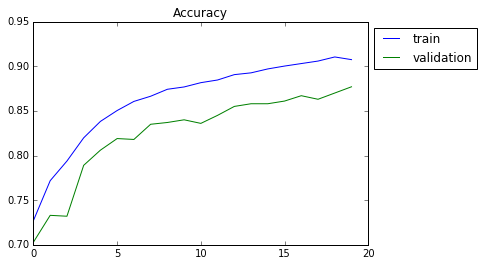

In [59]:
# Section 8
# Plot graph
x = range(epochs)
plt.plot(x, history.history['acc'], label='train')
plt.plot(x, history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()